In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,LSTM, Dense

import math

In [2]:
df=pd.read_csv('dataset.csv')

In [6]:
df.head()

,Unnamed: 0,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
0,2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
1,2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2,2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
3,2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
4,2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283


In [8]:
df.shape

(365, 6)

In [9]:
df=df.drop(columns='Unnamed: 0')

In [10]:
df.shape

(365, 5)

In [11]:
prices=df['Stock_1'].values.reshape(-1,1)
prices

array([[101.76405235],
       [102.17126854],
       [103.17125755],
       [105.48321524],
       [107.45317546],
       [106.40305934],
       [107.41398249],
       [107.25140368],
       [107.14070001],
       [107.58061812],
       [107.73558109],
       [109.3023511 ],
       [110.13418323],
       [110.26818901],
       [110.75762896],
       [111.12719874],
       [112.78752696],
       [112.55613402],
       [112.90851093],
       [111.94416414],
       [109.08624103],
       [109.79924899],
       [110.74839345],
       [109.92645761],
       [112.42151846],
       [110.78649849],
       [110.83719275],
       [110.62972342],
       [112.32543283],
       [113.97589643],
       [114.15249914],
       [114.58418111],
       [113.56691908],
       [111.31738956],
       [110.93010284],
       [111.10354091],
       [112.47043742],
       [113.82275929],
       [113.38189322],
       [113.03913664],
       [111.85386142],
       [110.26551653],
       [108.38408889],
       [110

In [12]:
#Scaling
scaler=MinMaxScaler(feature_range=(0,1))
scaled_prices=scaler.fit_transform(prices)


In [51]:
#Create Sequence Function
def sequence(data,time_steps=60):
    X=[]
    y=[]
    for i in range(len(data)-time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])

    return np.array(X),np.array(y)
    

In [52]:
TIME_STEPS = 60

X, y = sequence(scaled_prices, TIME_STEPS)

print("X Shape:", X.shape)
print("y Shape:", y.shape)

X Shape: (305, 60, 1)
y Shape: (305, 1)


In [53]:
train_size = int(len(X) * 0.8)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

In [54]:
model = Sequential()

model.add(SimpleRNN(
    units=50,
    activation='tanh',
    input_shape=(TIME_STEPS, 1)
))

model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.summary()

c:\Users\nishi\Desktop\Projects\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
history = model.fit(
    X_train,
    y_train,
    epochs=25,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=0
)


In [65]:
predicted_prices = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predicted_prices)

real_prices = scaler.inverse_transform(y_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


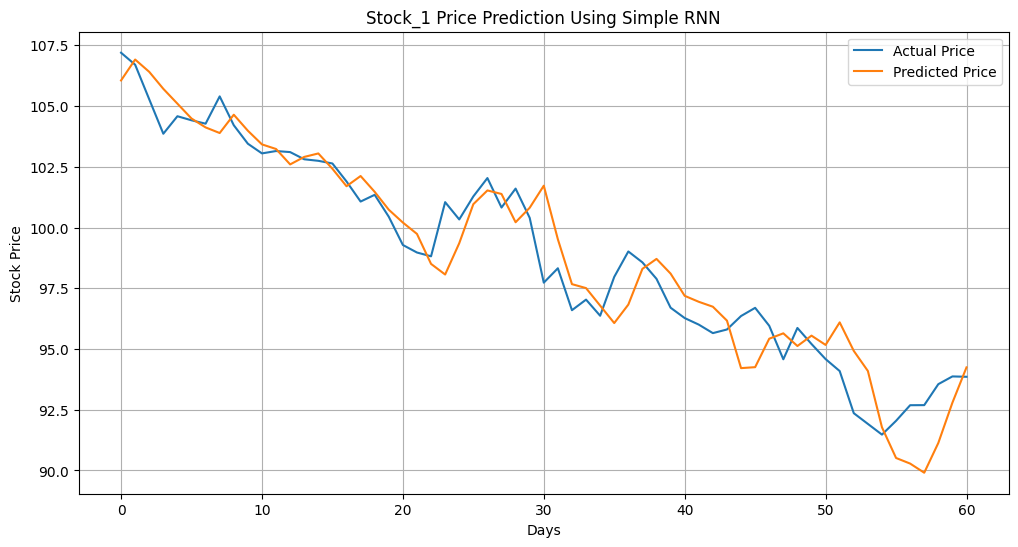

In [66]:
plt.figure(figsize=(12,6))

plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')

plt.title("Stock_1 Price Prediction Using Simple RNN")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()

plt.show()


In [67]:
rnn_rmse = math.sqrt(mean_squared_error(real_prices, predicted_prices))
rnn_mae = mean_absolute_error(real_prices, predicted_prices)
print(f"RNN RMSE: {rnn_rmse:.4f}, MAE: {rnn_mae:.4f}")

RNN RMSE: 1.3401, MAE: 1.0244


“Although LSTM is generally more powerful for long sequences, for small datasets RNN may perform better.”

In [68]:

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='tanh', input_shape=(TIME_STEPS,1)))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam',
                    loss='mean_squared_error')



c:\Users\nishi\Desktop\Projects\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
lstm_history = lstm_model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=16, 
    validation_data=(X_test, y_test),
    verbose=0
)

In [70]:
# Predict with LSTM
lstm_pred = lstm_model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step


In [71]:
# Evaluate LSTM
lstm_rmse = math.sqrt(mean_squared_error(real_prices, lstm_pred))
lstm_mae = mean_absolute_error(real_prices, lstm_pred)
print(f"LSTM RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}")

LSTM RMSE: 1.8757, MAE: 1.5206


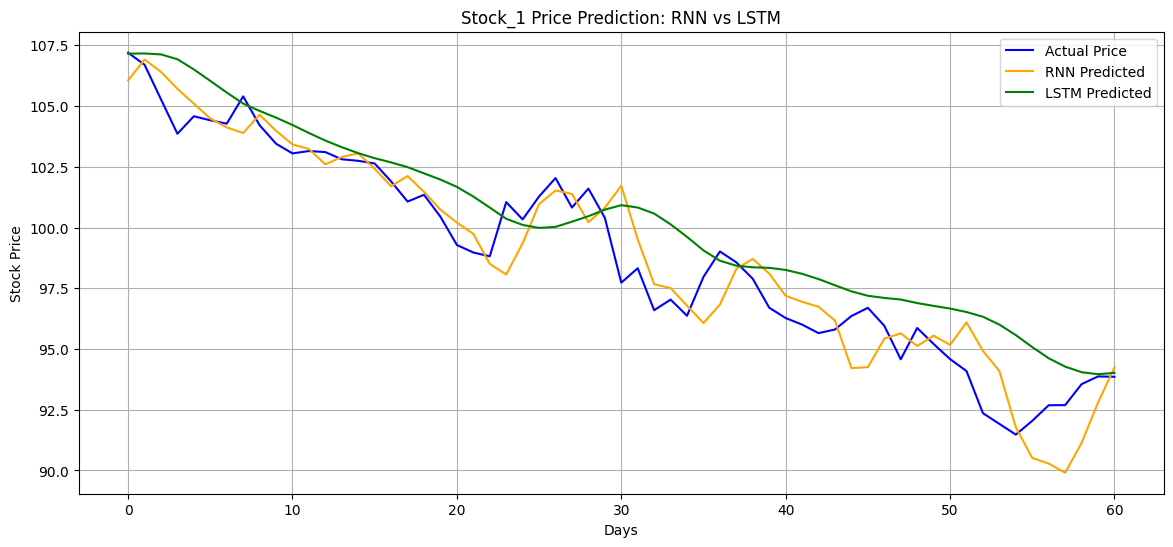

In [73]:
plt.figure(figsize=(14,6))
plt.plot(real_prices, label='Actual Price', color='blue')
plt.plot(predicted_prices, label='RNN Predicted', color='orange')
plt.plot(lstm_pred, label='LSTM Predicted', color='green')
plt.title("Stock_1 Price Prediction: RNN vs LSTM")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()